## 226. Invert Binary Tree

Given the root of a binary tree, invert the tree, and return its root.

 

Example 1:      
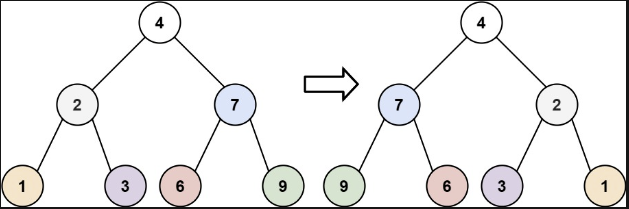     

Input: root = [4,2,7,1,3,6,9]       
Output: [4,7,2,9,6,3,1]         
Example 2:      
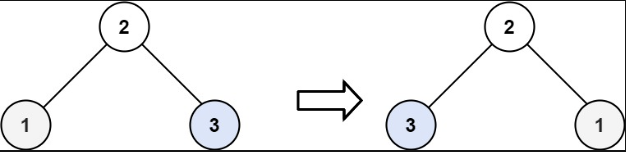

Input: root = [2,1,3]       
Output: [2,3,1]     
Example 3:      

Input: root = []        
Output: []      
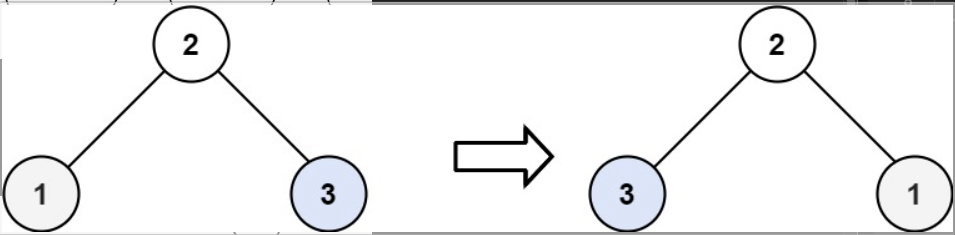

In [47]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


# utility function for printing tree in level order BFS
def bfs(root):
    if root is None:
        return
    queue = [root]
    while queue:
        node = queue.pop(0)
        print(node.val, end="->")
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

# utility function to convert list to tree in level order BFS
def buildTree(arr):
    if not arr:
        return None
    root = TreeNode(arr[0])
    q = [root]
    i = 1
    while i < len(arr):
        curr = q.pop(0)
        if i < len(arr):
            curr.left = TreeNode(arr[i])
            q.append(curr.left)
            i += 1
        if i < len(arr):
            curr.right = TreeNode(arr[i])
            q.append(curr.right)
            i += 1
    return root


def invertTreeRecursive(root: TreeNode) -> TreeNode:
    if root is None:
        return
    invertTreeRecursive(root.left)
    invertTreeRecursive(root.right)
    
    root.left, root.right = root.right, root.left
    
    # tmp = root.left
    # root.left = root.right
    # root.right = tmp
    
    return root

def invertTreeIterative(root: TreeNode) -> TreeNode:
    if root is None:
        return
    queue = [root]
    while queue:
        node = queue.pop()
        node.left, node.right = node.right, node.left
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return root


root = [4, 2, 7, 1, 3, 6, 9]
tree = buildTree(root)
#print(tree.left.right.val)
bfs(tree)
print("\n************")
print("\n Invert Tree Recursive")
inverted = invertTreeRecursive(tree)
bfs(inverted)

print("\n************")

root2 = [2,1,3]
tree2 = invertTreeRecursive(buildTree(root2))
bfs(tree2)

print("\n************")
print("\n Invert Tree Iterative")

invertedIteratively = invertTreeIterative(buildTree(root))
bfs(invertedIteratively)

4->2->7->1->3->6->9->
************

 Invert Tree Recursive
4->7->2->9->6->3->1->
************
2->3->1->
************

 Invert Tree Iterative
4->7->2->9->6->3->1->

In [34]:
root = [4, 2, 7, 1, 3, 6, 9]

queue = [buildTree(root)]
curr = queue.pop()
print("initial left:",curr.left.val,"|right:", curr.right.val)
# curr.left = curr.right
# curr.right = curr.left
curr.left, curr.right = curr.right, curr.left
print("after swap:",curr.left.val,"|right:", curr.right.val)

initial left: 2 |right: 7
after swap: 7 |right: 2


## 104. Maximum Depth of Binary Tree

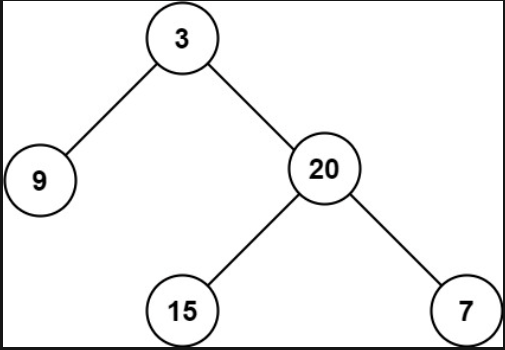

In [50]:
root1 = [3,9,20,None,None,15,7] # returns 3 
root2 = [1,None,2]              # returns 2

In [127]:
def preorderdfs(node):
    if node is None: return node
    print(node.val, end="->")
    preorderdfs(node.left)     # recursively call left node
    preorderdfs(node.right)    # recursively call right node
    
def dfs(node):
    s = [node]
    while s:
        curr = s.pop()
        print(curr.val, end="->")
        if curr.right:
            s.append(curr.right)
        if curr.left:
            s.append(curr.left)
            
def maxdepthexperiments(root: TreeNode) -> TreeNode:
    if root is None:
        return
    queue = [root]
    i = 1
    hm = {}
    hm[root] = 1
    while queue:
        # print("iteration: ",i)
        i+=1
        node = queue.pop()
        print(node.val)
        # if not (node.right and node.left):
            # print("end of path!")
            # print(node.val)
        # print(node.val, end="->")
        # node.left, node.right = node.right, node.left
        if node.left and node.left.val is not None:
            queue.append(node.left)
            hm[node.left] = hm[node] + 1
        if node.right and node.right.val is not None:
            queue.append(node.right)
            hm[node.right] = hm[node] + 1
    print(hm)
    return root

### my dirty solution with hashmap and iterative method probably O(N) time and O(N) space complexity

> more than O(N) SPACE COMPLEXITY BECAUSE I USE HASHMAP AND QUEUE

In [124]:
def maxdepth(root: TreeNode) -> int:
    if root is None:
        return 0
    q = [root]
    hm = {}
    hm[root] = 1    # depth of the root is 1 initially
    while q:
        node = q.pop()
        if node.left and node.left.val is not None:
            q.append(node.left)
            hm[node.left] = hm[node] + 1
        if node.right and node.right.val is not None:
            q.append(node.right)
            hm[node.right] = hm[node] + 1
    return max(hm.values())

### recursive DFS solution O(N) time and O(N) space complexity

In [132]:
def maxdepthrecursive(root:TreeNode) -> int:
    if root is None: return 0
    return 1+ max(maxdepthrecursive(root.left), maxdepthrecursive(root.right))

### Iterative BFS solution O(N) time and O(N) space complexity

In [159]:
from collections import deque
def maxdepth_bfs_iterative(root: TreeNode):
    if root is None:
        return 0 
    level = 0
    q = deque([root])
    while q:
        for _ in range(len(q)):
            node = q.popleft()
            # print("popped at level: ",level+1," value:",node.val)
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
        level +=1
    return level 

### Iterative DFS solution O(N) time and O(N) space complexity

In [164]:
def maxdepth_dfs_iterative(root: TreeNode) -> int:
    stack = [[root, 1]]
    res = 0
    while stack:
        node, depth = stack.pop()
        if node:
            res = max(res, depth) 
            stack.append([node.left,depth +1])
            stack.append([node.right,depth +1])
    return res

In [166]:
tree1 = buildTree(root1)
tree2 = buildTree(root2)
print(maxdepth(tree2))
print(maxdepthrecursive(tree2))
print(maxdepth_bfs_iterative(tree1))
print(maxdepth_dfs_iterative(tree1))

2
2
3
3
